## Assignment III
### EE6347
#### Author: Ayush Jamdar / EE20B018
Implement the Stanford Model to demonstrate the quasi-DC switching in a Bipolar RRAM


Start with importing necessary libraries. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Model Parameters (as given in the Assignment)

In [2]:
# Model Parameters
k = 1.38064852e-23 # Boltzmann constant
gap_init = {'set': 3e-9, 'reset': 0.5e-9} # initial gap
q = 1.60217662e-19 # Electron charge
ve0 = 7e7 # Attempt to escape velocity
I0 = 0.65e-4 # current fitting parameter
Ea = 1.2 # Activation energy of ionic hopping in eV
g0 = 0.2e-9 # gap fitting parameter 
a = 0.3e-10 # lattice constant
V0 = 0.5 # voltage fitting parameter
gamma = 22.5 # field enhancement factor / susceptibility
Rth = 8e6 # thermal resistance
T_amb = 300 # ambient temperature in Kelvin
g_min = 0.5e-9 # minimum gap
g_max = 3e-9 # maximum gap
Icc = 10e-6 # current compliance for SET operation
L = 8e-9 # dielectric thickness

# Algorithm Parameters
dt = 0.001 # Time step in sec
T_max = 3 # Maximum time in sec
T = np.arange(0, T_max, dt) # Time array

### SET Process
Now we begin modelling the first half of the concept, i.e. the SET process. Here we take a time array and change input voltage in a ramp fashion - V increases linearly from zero to `V_on` in one second and back to zero in another.

In [3]:
V_on = 3 # SET voltage
V_SET = np.append(np.linspace(0, V_on, int(T_max/(2*dt))), np.linspace(V_on, 0, int(T_max/(2*dt)))) # SET voltage array

Now the function `solve_de()` to get the gap length, current and temperature will operate on the input voltage and solve the differential equations using the Forward Euler method.

In [12]:
def solve_de(V, T=T, process='set', T_amb=300):
    # T here is time, T_amb is ambient temperature
    # Implement a Forward Euler Algorithm
    gap = np.zeros(len(T))
    I = np.zeros(len(V))
    Temp = np.ones(len(V))*T_amb
    gap[0] = gap_init[process]

    for i in range(1, len(T)):
        gap[i] = gap[i-1] - dt*ve0*np.exp(-Ea*q/(k*Temp[i-1]))*np.sinh(q*a*gamma*V[i-1]/(L*k*Temp[i-1]))
        
        if gap[i] < g_min:
            gap[i] = g_min
        elif gap[i] > g_max:
            gap[i] = g_max
        
        I[i] = I0*np.exp(-gap[i]/g0)*np.sinh(V[i]/V0)
        
        if I[i] > Icc:
            I[i] = Icc
            
        Temp[i] = T_amb + V[i]*I[i]*Rth     
    
    return gap, I, Temp

gap_set, current_set, temp_set = solve_de(V_SET, process='set')

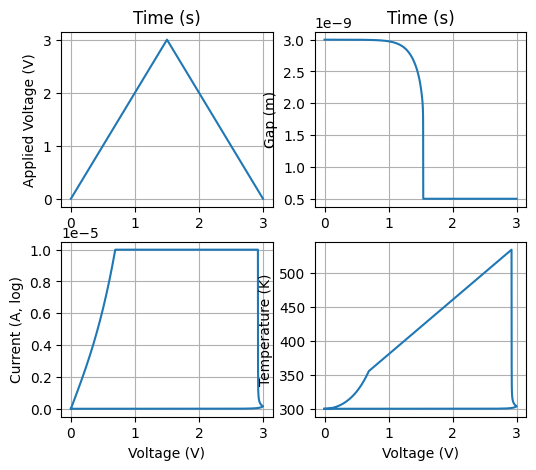

In [13]:
# Plot the SET Process
fig_set, axs_set = plt.subplots(2, 2, figsize=(6, 5))
axs_set[0, 0].plot(T, V_SET)
axs_set[0, 0].set(ylabel='Applied Voltage (V)', title='Time (s)')
axs_set[0, 0].grid()
axs_set[0, 1].plot(T, gap_set)
axs_set[0, 1].set(ylabel='Gap (m)', title='Time (s)')
axs_set[0, 1].grid()
axs_set[1, 0].plot(V_SET, (current_set))
axs_set[1, 0].set(ylabel='Current (A, log)', xlabel='Voltage (V)')
axs_set[1, 0].grid()
axs_set[1, 1].plot(V_SET, temp_set)
axs_set[1, 1].set(ylabel='Temperature (K)', xlabel='Voltage (V)')
axs_set[1, 1].grid()
plt.show()

### RESET Process
Now we begin modelling the second half of the concept, i.e. the RESET process. Here we take a time array and change input voltage in a ramp fashion - V decreases linearly from zero to `V_off` in one second and back to zero in another. If `V_off` is equal to `V_on`, then we can simply negate the `V_SET`.

In [6]:
V_RESET = -V_SET # RESET voltage array
gap_reset, current_reset, temp_reset = solve_de(V_RESET, process='reset')

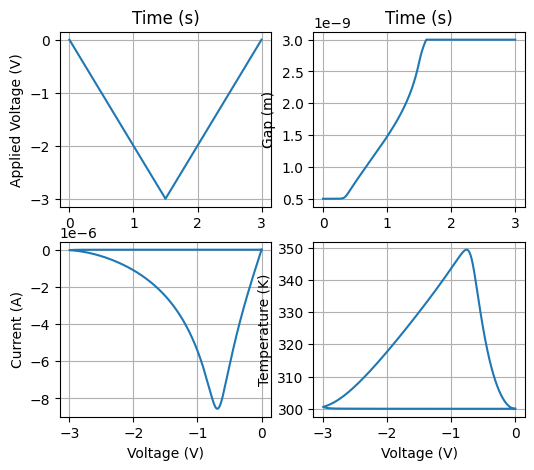

In [7]:
# Plot the RESET Process just like the SET process
fig_reset, axs_reset = plt.subplots(2, 2, figsize=(6, 5))
axs_reset[0, 0].plot(T, V_RESET)
axs_reset[0, 0].set(ylabel='Applied Voltage (V)', title='Time (s)')
axs_reset[0, 0].grid()
axs_reset[0, 1].plot(T, gap_reset)
axs_reset[0, 1].set(ylabel='Gap (m)', title='Time (s)')
axs_reset[0, 1].grid()
axs_reset[1, 0].plot(V_RESET, current_reset)
axs_reset[1, 0].set(ylabel='Current (A)', xlabel='Voltage (V)')
axs_reset[1, 0].grid()
axs_reset[1, 1].plot(V_RESET, temp_reset)
axs_reset[1, 1].set(ylabel='Temperature (K)', xlabel='Voltage (V)')
axs_reset[1, 1].grid()
plt.show()

#### I vs V for SET and RESET
Here we plot these characteristics for farying temperature.
Operate for different `T_amb`

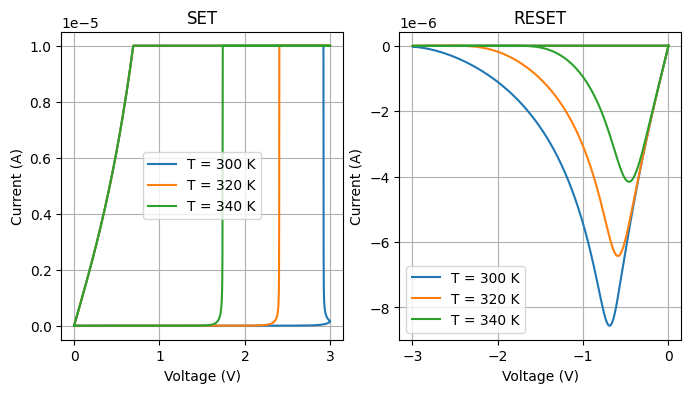

In [8]:
# SET
_, i_set_t1, _ = solve_de(V_SET, process='set', T_amb=300)
_, i_set_t2, _ = solve_de(V_SET, process='set', T_amb=320)
_, i_set_t3, _ = solve_de(V_SET, process='set', T_amb=340)

# RESET
_, i_reset_t1, _ = solve_de(V_RESET, process='reset', T_amb=300)
_, i_reset_t2, _ = solve_de(V_RESET, process='reset', T_amb=320)
_, i_reset_t3, _ = solve_de(V_RESET, process='reset', T_amb=340)


# plot i vs v for set and reset on subplots
fig_iv, axs_iv = plt.subplots(1, 2, figsize=(8, 4))
axs_iv[0].plot(V_SET, i_set_t1, label='T = 300 K')  
axs_iv[0].plot(V_SET, i_set_t2, label='T = 320 K')
axs_iv[0].plot(V_SET, i_set_t3, label='T = 340 K')
axs_iv[0].set(xlabel='Voltage (V)', ylabel='Current (A)', title='SET')
axs_iv[0].legend()
axs_iv[0].grid()
axs_iv[1].plot(V_RESET, i_reset_t1, label='T = 300 K')
axs_iv[1].plot(V_RESET, i_reset_t2, label='T = 320 K')
axs_iv[1].plot(V_RESET, i_reset_t3, label='T = 340 K')
axs_iv[1].set(xlabel='Voltage (V)', ylabel='Current (A)', title='RESET')
axs_iv[1].legend()
axs_iv[1].grid()
plt.show()


### Programming an RRAM
Using an input voltage pulse, we now program the RRAM.
From the previous plots, we take voltage values less than `V_on` and `V_off` and apply them to the RRAM. 

Finally, we plot the change in conductance of the RRAM with time. 

C:\Users\USER\AppData\Local\Temp\ipykernel_7804\1038103726.py:24: RuntimeWarning: invalid value encountered in divide
  conductance_program = i_program/V_program # Programming conductance


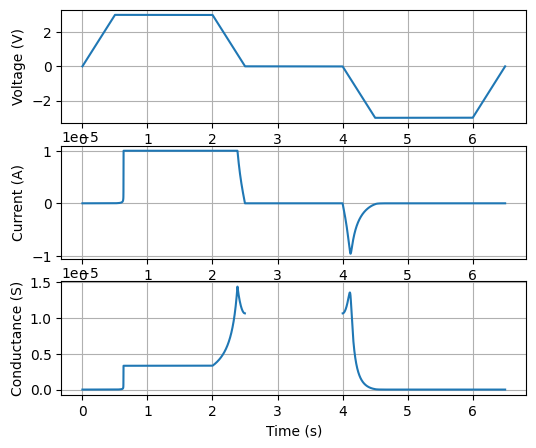

In [9]:
t_program = 1.5 # Programming time in sec

V1_set = np.concatenate(
    (
        np.linspace(0, V_on, int(t_program / 3 / dt)),
        np.ones(int(t_program / dt)) * V_on,
        np.linspace(V_on, 0, int(t_program / 3 / dt)),
    )
)

V2_reset = np.concatenate(
    (
        np.linspace(0, -V_on, int(t_program / 3 / dt)),
        np.ones(int(t_program / dt)) * -V_on,
        np.linspace(-V_on, 0, int(t_program / 3 / dt)),
    )
)

V_program = np.concatenate(
    (V1_set, np.zeros(int(t_program / dt)), V2_reset)
)  # Programming voltage

T_program = np.linspace(0, dt*len(V_program), len(V_program))

_, i_program, _ = solve_de(V_program, T=T_program, process='set', T_amb=300) # Programming current
conductance_program = i_program/V_program # Programming conductance

# Plot I, V on one subplot and conductance on another
# use a different y axis for I and V
fig_program, axs_program = plt.subplots(3, 1, figsize=(6, 5))
axs_program[0].plot(T_program, V_program)
axs_program[0].set(ylabel='Voltage (V)')
axs_program[0].grid()
axs_program[1].plot(T_program, i_program)
axs_program[1].set(ylabel='Current (A)')
axs_program[1].grid()
axs_program[2].plot(T_program, conductance_program)
axs_program[2].set(ylabel='Conductance (S)', xlabel='Time (s)')
axs_program[2].grid()
plt.show()

t_store = L2/D 
t_write = L/mu.E
D/mu = kT/q
tstore/twrite = (L/2a).e(E/E0)
